In [3]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import numpy as np
#import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


In [5]:
logmymean = 100


In [6]:
df = mymean

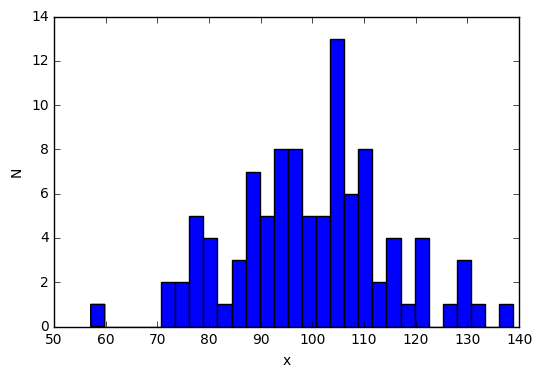

In [7]:
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')


In [8]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))


Chisq mean: 99.69, standard deviation: 14.88


In [87]:
mysize = (2000.0 / (np.array(range(1, 100)))).astype(float)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[ 2000.          1000.           666.66666667   500.           400.
   333.33333333   285.71428571   250.           222.22222222   200.
   181.81818182   166.66666667   153.84615385   142.85714286   133.33333333
   125.           117.64705882   111.11111111   105.26315789   100.
    95.23809524    90.90909091    86.95652174    83.33333333    80.
    76.92307692    74.07407407    71.42857143    68.96551724    66.66666667
    64.51612903    62.5           60.60606061    58.82352941    57.14285714
    55.55555556    54.05405405    52.63157895    51.28205128    50.
    48.7804878     47.61904762    46.51162791    45.45454545    44.44444444
    43.47826087    42.55319149    41.66666667    40.81632653    40.
    39.21568627    38.46153846    37.73584906    37.03703704    36.36363636
    35.71428571    35.0877193     34.48275862    33.89830508    33.33333333
    32.78688525    32.25806452    31.74603175    31.25          30.76923077
    30.3030303     29.85074627    29.41176471    28.98550725

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


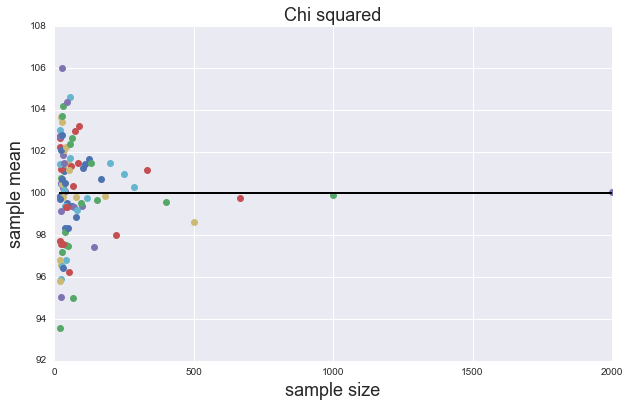

In [88]:
# I am gonna overwrite the dictionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [37]:
#As the sample size increases the mean will move toward the poulation 
#mean

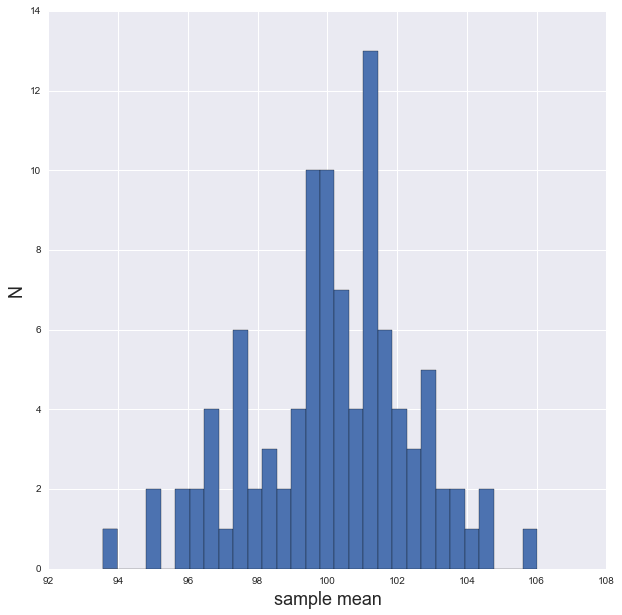

In [89]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [ ]:
#Do it for the Normal distribution lnorm

#################################################################################################
###############################################################################################
###NORMAL###########NORMAL#################NORMAL##################NORMAL####################


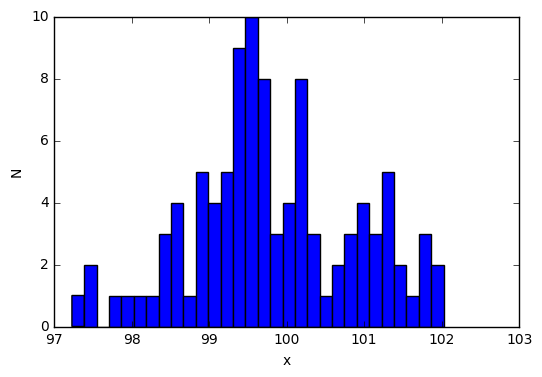

In [9]:
mymean = 100
mystd = 1


md = {}
# md is an empty disctionary
md['lnorm'] = np.random.normal(mymean, mystd, size=100)
# md now is a dictionary with one object: an array by the key 'lnorm'
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [10]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Normal mean: 99.81, standard deviation: 1.06


In [11]:
mysize = (2000.0 / (np.array(range(1, 100)))).astype(float)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[ 2000.          1000.           666.66666667   500.           400.
   333.33333333   285.71428571   250.           222.22222222   200.
   181.81818182   166.66666667   153.84615385   142.85714286   133.33333333
   125.           117.64705882   111.11111111   105.26315789   100.
    95.23809524    90.90909091    86.95652174    83.33333333    80.
    76.92307692    74.07407407    71.42857143    68.96551724    66.66666667
    64.51612903    62.5           60.60606061    58.82352941    57.14285714
    55.55555556    54.05405405    52.63157895    51.28205128    50.
    48.7804878     47.61904762    46.51162791    45.45454545    44.44444444
    43.47826087    42.55319149    41.66666667    40.81632653    40.
    39.21568627    38.46153846    37.73584906    37.03703704    36.36363636
    35.71428571    35.0877193     34.48275862    33.89830508    33.33333333
    32.78688525    32.25806452    31.74603175    31.25          30.76923077
    30.3030303     29.85074627    29.41176471    28.98550725

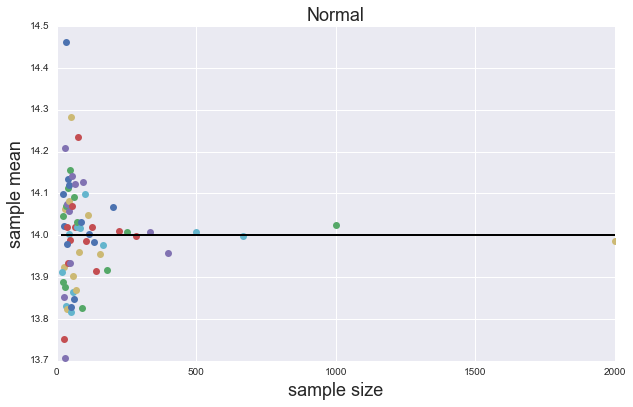

In [118]:
# I am gonna overwrite the dictionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.normal(mymean, mystd, size=n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

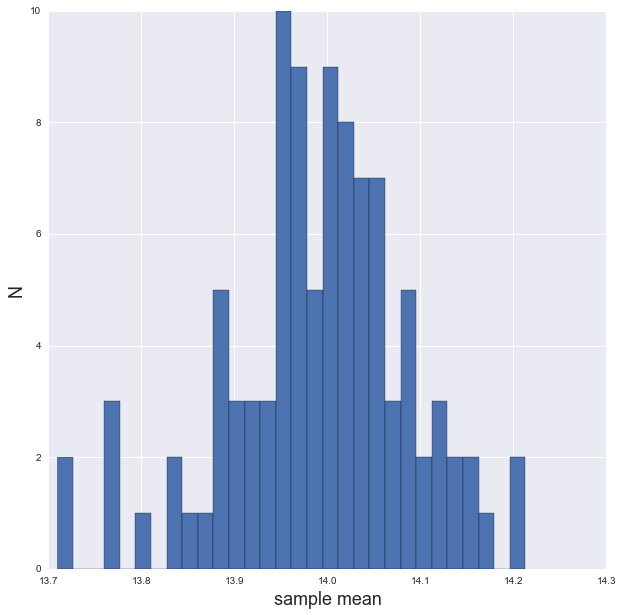

In [112]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#Do it for the Poisson Distribution

###POISSON#####################################################################################
###POISSON#####################################################################################
###############################################################################################
###POISSON#####################################################################################
###############################################################################################

Poisson mean: 100.84, standard deviation: 10.17
[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


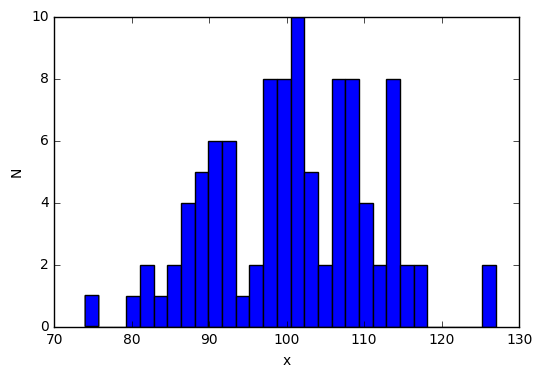

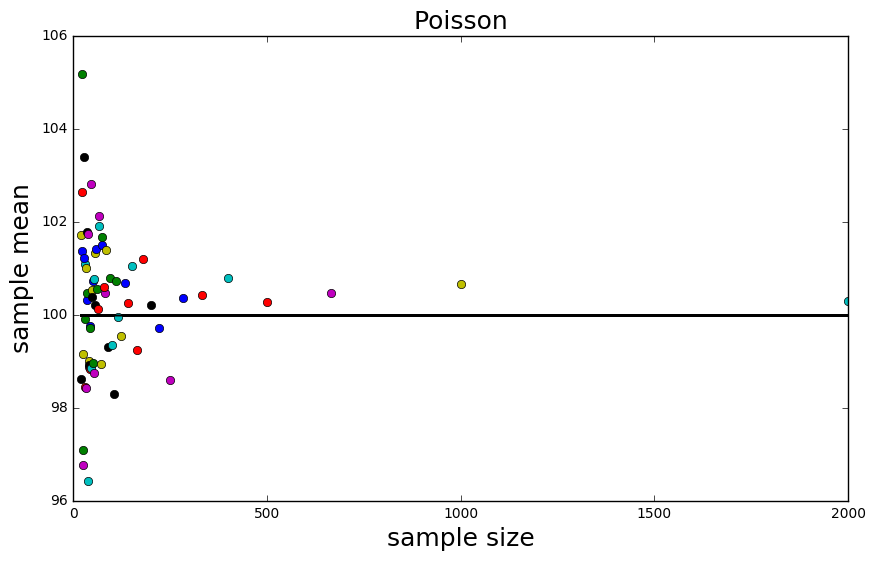

In [43]:
lam = 100
md = {}
# md is an empty dictionary
md['pois'] = np.random.poisson(lam, size=100)
# md now is a dictionary with one object: an array by the key 'pois'
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
pois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        pois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        pois_mu_n.set_xlabel('sample size', fontsize=18)
        pois_mu_n.set_ylabel('sample mean', fontsize=18)
        pois_mu_n.set_title('Poisson', fontsize=18)
        pois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')

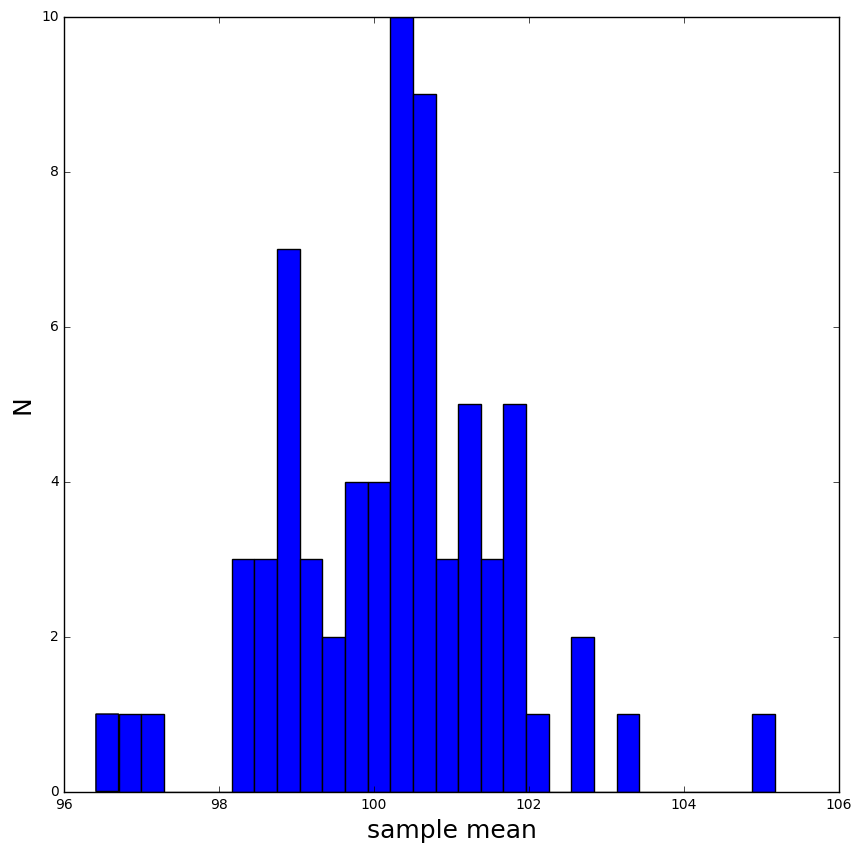

In [44]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#Do it for the Binomial########################################################################

##BINOMIAL#####################################################################################
##BINOMIAL#####################################################################################
#################################################################################################
##BINOMIAL#####################################################################################
#############################################################################################
#############################################################################################
#LOOK AT WHAT IS BEING PLOTTED##CHECK WIKIPEDIA

Binomial mean: 100.26, standard deviation: 6.90
[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


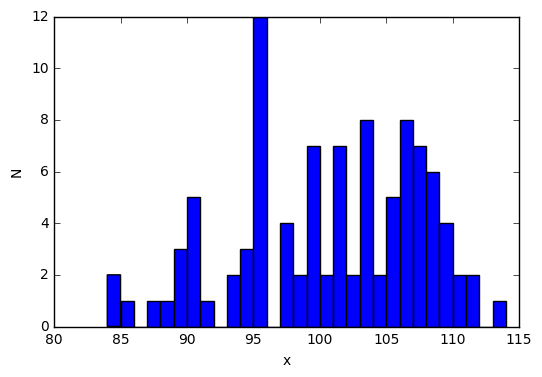

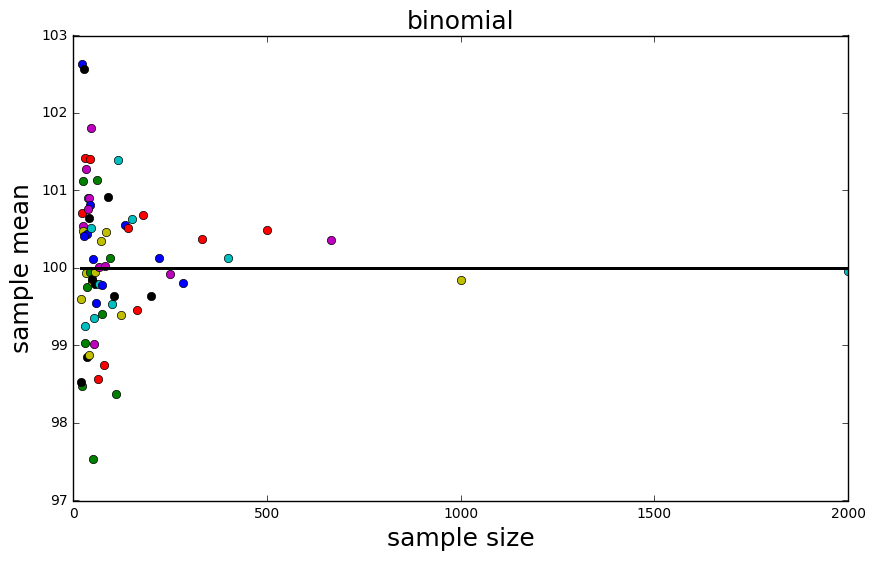

In [40]:


#numpy.random.binomial(n, p, size=None)
md = {}
parameter_n=200
# md is an empty dictionary
md['binomial'] = np.random.binomial(parameter_n, 0.5, size=100)
# md now is a dictionary with one object: an array by the key 'binomial'
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(parameter_n, 0.5, size= n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
binomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        binomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        binomial_mu_n.set_xlabel('sample size', fontsize=18)
        binomial_mu_n.set_ylabel('sample mean', fontsize=18)
        binomial_mu_n.set_title('binomial', fontsize=18)
        binomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

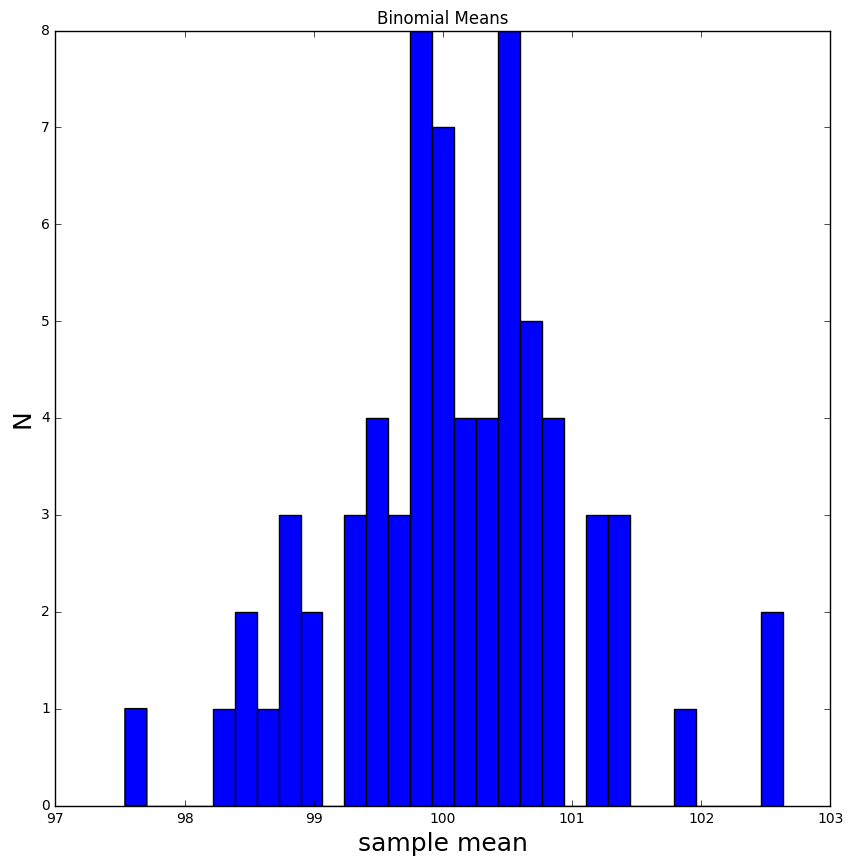

In [41]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial Means')

#Lognormal Distribution
#####################################################################################
############

exponential mean: 117.71, standard deviation: 112.55
[ 2000.  1000.   666.   500.   400.   333.   285.   250.   222.   200.
   181.   166.   153.   142.   133.   125.   117.   111.   105.   100.
    95.    90.    86.    83.    80.    76.    74.    71.    68.    66.
    64.    62.    60.    58.    57.    55.    54.    52.    51.    50.
    48.    47.    46.    45.    44.    43.    42.    41.    40.    40.
    39.    38.    37.    37.    36.    35.    35.    34.    33.    33.
    32.    32.    31.    31.    30.    30.    29.    29.    28.    28.
    28.    27.    27.    27.    26.    26.    25.    25.    25.    25.
    24.    24.    24.    23.    23.    23.    22.    22.    22.    22.
    21.    21.    21.    21.    21.    20.    20.    20.    20.] (99,)


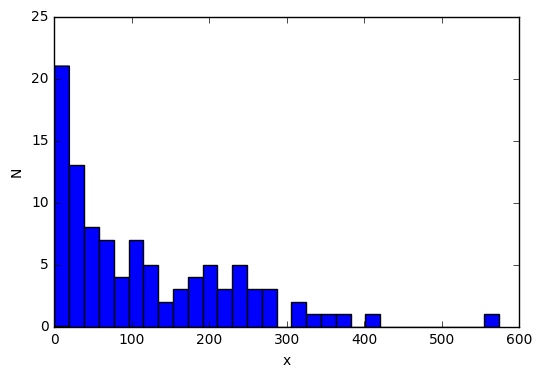

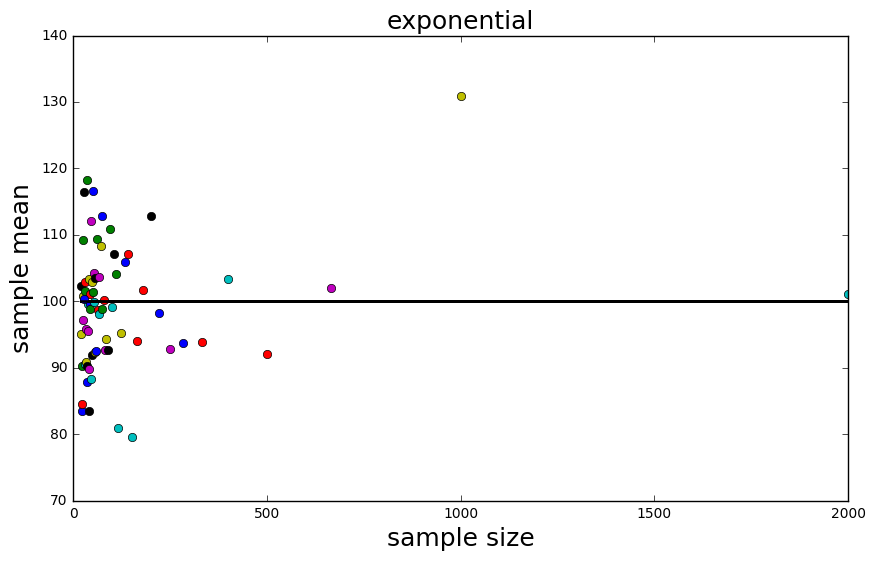

In [45]:
#np.random.exponential(100, size = 100)

md = {}

# md is an empty dictionary
md['exponential'] = np.random.exponential(100, size=100)
# md now is a dictionary with one object: an array by the key 'binomial'
pl.hist(md['exponential'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

print ("exponential mean: %.2f, standard deviation: %.2f"%(md['exponential'].mean(), md['exponential'].std()))

mysize = (2000 / (np.array(range(1, 100)))).astype(float)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

md['exponential'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['exponential'][n] = np.random.exponential(100, size=100)
    
# save the means for plotting later    

md['exponential']['means'] = {}
exponential_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exponential']:
    if not type(nn) == str:
        md['exponential']['means'][nn] = md['exponential'][nn].mean()
        #and plot it
        exponential_mu_n.plot(nn, md['exponential']['means'][nn], 'o')
        exponential_mu_n.set_xlabel('sample size', fontsize=18)
        exponential_mu_n.set_ylabel('sample mean', fontsize=18)
        exponential_mu_n.set_title('exponential', fontsize=18)
        exponential_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

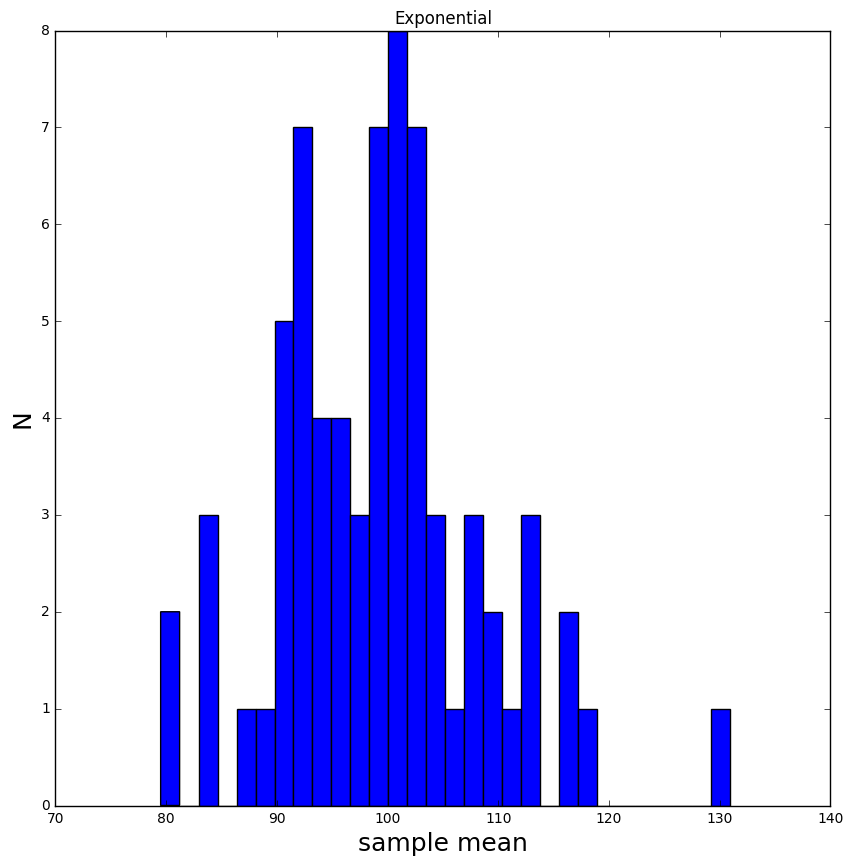

In [46]:
allmeans = list(md['exponential']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Exponential')

###Describe the behavior you see in the plots in terms of the law of large numbers.
In the plots we see that as the sample size increases the sample mean moves toward the population mean. Also, a N increases, the mean of the distributions moves toward the population mean. 


###PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing

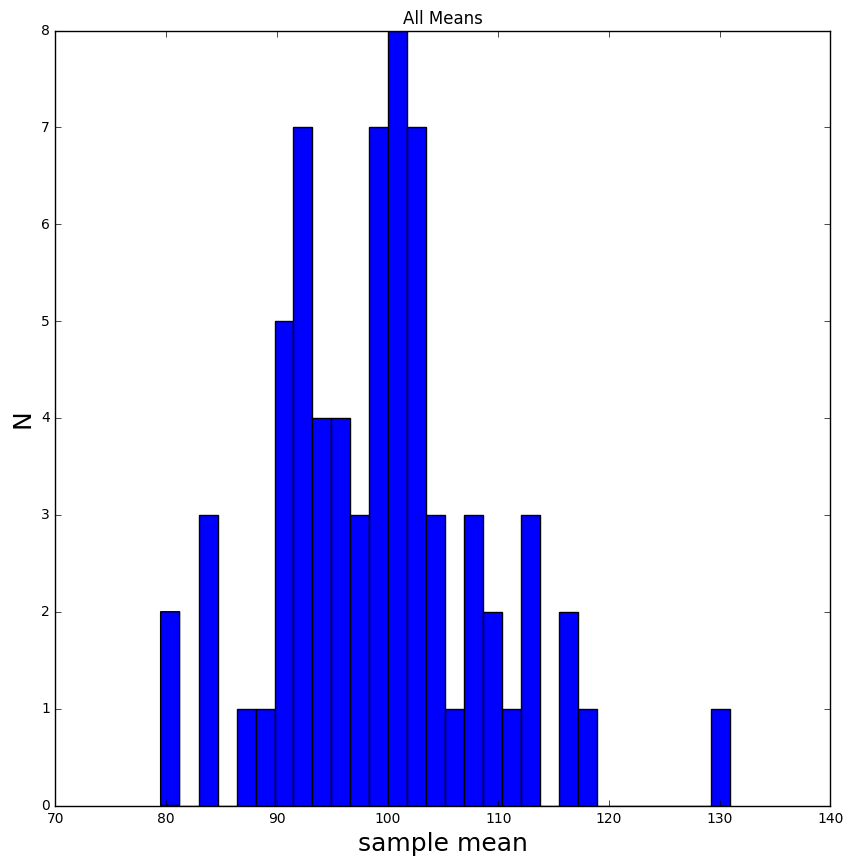

In [59]:
#Create a list of all the sample means



new_list = []

for i in md.keys():
    for nn in md[i]:
        if not type(nn) == str:
            new_list.append(md[i][nn].mean())
#Plot the means to a histogram
pl.figure(figsize=(10, 10))
pl.hist(new_list,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('All Means')




# Try to fit a Gausian


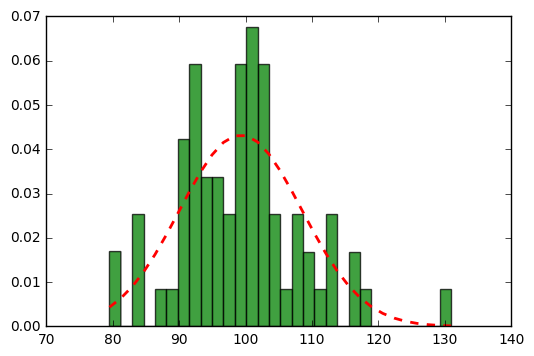

In [62]:
#This is from: http://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python

from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#Try to fit a Gaussian
# best fit of data
(mu, sigma) = norm.fit(new_list)

# the histogram of the data
n, bins, patches = plt.hist(new_list, 30, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

